<a href="https://colab.research.google.com/github/KOMPALALOKESH/capstone-projects/blob/main/Autogluon_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [6]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df,test_size=0.2,random_state=0)

In [9]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
192,7,159,66,0,0,30.4,0.383,36,1
629,4,94,65,22,0,24.7,0.148,21,0
559,11,85,74,0,0,30.1,0.300,35,0


In [10]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


In [11]:
df_predictor = TabularPredictor(label='Outcome',problem_type='binary',eval_metric='accuracy').fit(X_train,time_limit=200,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230127_173340/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20230127_173340/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12219.55 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	St

In [13]:
df_predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.152432  32.533299                0.001564           0.746654            2       True         14
1    NeuralNetFastAI_BAG_L1   0.788274       0.112058  20.809460                0.112058          20.809460            1       True         10
2           CatBoost_BAG_L1   0.781759       0.007533  36.805918                0.007533          36.805918            1       True          7
3         LightGBMXT_BAG_L1   0.780130       0.020113  13.437768                0.020113          13.437768            1       True          3
4           LightGBM_BAG_L1   0.780130       0.035619  19.433280                0.035619          19.433280            1       True          4
5            XGBoost_BAG_L1   0.773616       0.038810  10.977185                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7003257328990228,
  'KNeighborsDist_BAG_L1': 0.6970684039087948,
  'LightGBMXT_BAG_L1': 0.7801302931596091,
  'LightGBM_BAG_L1': 0.7801302931596091,
  'R

In [14]:
df_predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.152432  32.533299                0.001564           0.746654            2       True         14
1    NeuralNetFastAI_BAG_L1   0.788274       0.112058  20.809460                0.112058          20.809460            1       True         10
2           CatBoost_BAG_L1   0.781759       0.007533  36.805918                0.007533          36.805918            1       True          7
3         LightGBMXT_BAG_L1   0.780130       0.020113  13.437768                0.020113          13.437768            1       True          3
4           LightGBM_BAG_L1   0.780130       0.035619  19.433280                0.035619          19.433280            1       True          4
5            XGBoost_BAG_L1   0.773616       0.038810  10.977185                0.038810          10.977185            1       True         11

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.793160,0.152432,32.533299,0.001564,0.746654,2,True,14
1,NeuralNetFastAI_BAG_L1,0.788274,0.112058,20.809460,0.112058,20.809460,1,True,10
2,CatBoost_BAG_L1,0.781759,0.007533,36.805918,0.007533,36.805918,1,True,7
3,LightGBMXT_BAG_L1,0.780130,0.020113,13.437768,0.020113,13.437768,1,True,3
4,LightGBM_BAG_L1,0.780130,0.035619,19.433280,0.035619,19.433280,1,True,4
5,XGBoost_BAG_L1,0.773616,0.038810,10.977185,0.038810,10.977185,1,True,11
6,LightGBMLarge_BAG_L1,0.763844,0.027555,15.081623,0.027555,15.081623,1,True,13
7,NeuralNetTorch_BAG_L1,0.763844,0.100538,21.542386,0.100538,21.542386,1,True,12
8,RandomForestEntr_BAG_L1,0.755700,0.223470,1.539660,0.223470,1.539660,1,True,6
9,RandomForestGini_BAG_L1,0.749186,0.270477,1.058801,0.270477,1.058801,1,True,5


                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.152432  32.533299                0.001564           0.746654            2       True         14
1    NeuralNetFastAI_BAG_L1   0.788274       0.112058  20.809460                0.112058          20.809460            1       True         10
2           CatBoost_BAG_L1   0.781759       0.007533  36.805918                0.007533          36.805918            1       True          7
3         LightGBMXT_BAG_L1   0.780130       0.020113  13.437768                0.020113          13.437768            1       True          3
4           LightGBM_BAG_L1   0.780130       0.035619  19.433280                0.035619          19.433280            1       True          4
5            XGBoost_BAG_L1   0.773616       0.038810  10.977185                0.038810          10.977185            1       True         11

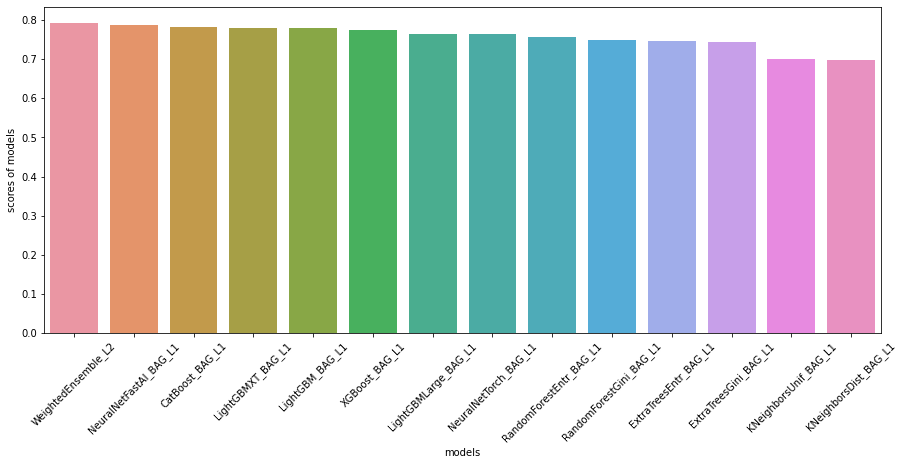

In [16]:
f,axs = plt.subplots(figsize=(15,6))
sns.barplot(x = 'model',y = 'score_val',data = df_predictor.leaderboard())
axs.set(xlabel='models',ylabel='scores of models')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# WeightedEnsemble_L2   0.793160 is good model among all 

In [17]:
df_predictor.evaluate(X_test)

Evaluation: accuracy on test data: 0.8311688311688312
Evaluations on test data:
{
    "accuracy": 0.8311688311688312,
    "balanced_accuracy": 0.7890236627560151,
    "mcc": 0.5933466528277093,
    "roc_auc": 0.86438655796381,
    "f1": 0.711111111111111,
    "precision": 0.7441860465116279,
    "recall": 0.6808510638297872
}


{'accuracy': 0.8311688311688312,
 'balanced_accuracy': 0.7890236627560151,
 'mcc': 0.5933466528277093,
 'roc_auc': 0.86438655796381,
 'f1': 0.711111111111111,
 'precision': 0.7441860465116279,
 'recall': 0.6808510638297872}

In [22]:
y_predict = df_predictor.predict(X_test)
y_predict.head()

661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

In [21]:
y_test = X_test['Outcome']
y_test.head()

661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

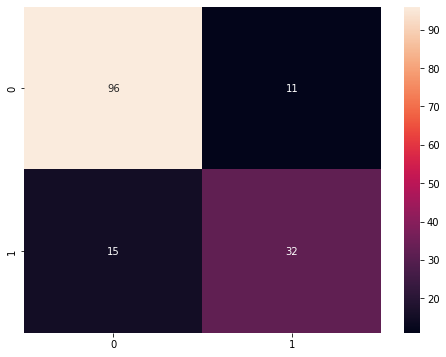

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
plt.show()

In [33]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.68      0.71        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154

